In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

as mentioned in eda part 1 that this dataset is veg friendly and the ration is 90/10 
which is not a good dataset for the analysis purpose, so i manually added some non veg dishes 

for some states, as mention-
1. Tamilnadu = 30
2. Gujarat = 15
3. Andhra pradesh = 10
4. Karnataka = 10
5. Kerela = 6
6. Maharashtra = 15
7. Punjab = 20
8. Odisha = 10
9. rajasthan = 2
10. Uttar pradesh = 10
11. West Bengal = 10

and here is the final file for these dishes

In [2]:
non_veg = pd.read_csv('non-veg.csv')

In [3]:
non_veg.head()

,name,ingredients,diet,prep_time,cook_time,flavour,dish_type,state,region
0,chicken handi,"chicken, onion, tomato, spices, oil",non vegetarian,45,85,spicy,main course,gujarat,west
1,fish fry,"fish, chili powder, turmeric, lemon juice, oil",non vegetarian,35,75,spicy,starter,gujarat,west
2,egg curry,"egg, onion, tomato, masala, oil",non vegetarian,30,70,spicy,main course,gujarat,west
3,mutton curry,"mutton, onion, tomato, garlic, ginger, masala",non vegetarian,40,90,spicy,main course,gujarat,west
4,prawn masala,"prawn, onion, tomato, chili, curry leaves, masala",non vegetarian,35,80,spicy,main course,gujarat,west


In [4]:
non_veg.shape

(128, 9)

Finally merge it with the cleaned dataset

In [5]:
veg_df = pd.read_csv('indian_food_cleaned.csv')
nonveg_df = pd.read_csv('non-veg.csv')

final_df = pd.concat([veg_df, nonveg_df], ignore_index=True)

final_df.to_csv('food_cleaned_2.csv', index=False)

In [6]:
df = pd.read_csv('food_cleaned_2.csv')

In [7]:
df.shape

(383, 9)

In [8]:
df['diet'] = df['diet'].astype('category')
df['flavour'] = df['flavour'].astype('category')

In [9]:
df['total_time'] = df['prep_time'] + df['cook_time']
df.insert(5, 'total_time', df.pop('total_time'))

In [10]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   name         383 non-null    object  
 1   ingredients  383 non-null    object  
 2   diet         383 non-null    category
 3   prep_time    383 non-null    int64   
 4   cook_time    383 non-null    int64   
 5   total_time   383 non-null    int64   
 6   flavour      383 non-null    category
 7   dish_type    383 non-null    object  
 8   state        383 non-null    object  
 9   region       383 non-null    object  
dtypes: category(2), int64(3), object(5)
memory usage: 25.1+ KB


,prep_time,cook_time,total_time
count,383.000000,383.000000,383.000000
mean,34.404700,51.112272,85.516971
std,53.680465,27.098046,65.731598
min,5.000000,2.000000,10.000000
25%,10.000000,30.000000,45.000000
50%,27.000000,40.000000,65.000000
75%,35.000000,77.500000,115.000000
max,500.000000,120.000000,620.000000


UNIVARIATE ANALYSIS

1. Name

- drop 43 duplicate values

In [11]:
df['name'].nunique()

343

In [12]:
df[df['name'].duplicated()]


,name,ingredients,diet,prep_time,cook_time,total_time,flavour,dish_type,state,region
276,crab masala,"crab, onion, tomato, ginger, garlic, chili pow...",non vegetarian,40,90,130,spicy,main course,tamil nadu,south
285,chicken biryani,"chicken, rice, onion, tomato, curd, masala",non vegetarian,40,85,125,spicy,main course,tamil nadu,south
286,mutton biryani,"mutton, rice, onion, tomato, curd, spices",non vegetarian,45,95,140,spicy,main course,tamil nadu,south
293,fish curry,"fish, coconut, turmeric, chili, mustard, curry...",non vegetarian,35,70,105,spicy,main course,tamil nadu,south
298,prawn masala,"prawn, onion, tomato, chili, curry leaves, masala",non vegetarian,35,80,115,spicy,main course,tamil nadu,south
302,prawn biryani,"prawn, rice, onion, tomato, mint, masala",non vegetarian,40,85,125,spicy,main course,karnataka,south
305,mutton curry,"mutton, onion, tomato, garlic, ginger, masala",non vegetarian,45,95,140,spicy,main course,karnataka,south
306,egg curry,"egg, onion, tomato, chili, spices",non vegetarian,30,70,100,spicy,main course,karnataka,south
307,fish fry,"fish, chili powder, turmeric, lemon juice, oil",non vegetarian,30,65,95,spicy,starter,karnataka,south
309,chicken biryani,"chicken, rice, onion, tomato, curd, masala",non vegetarian,40,90,130,spicy,main course,karnataka,south


In [13]:
# drop duplicates - keep first 
df = df.drop_duplicates(subset=['name'], keep='first')

print(df['name'].duplicated().sum())

0


In [14]:
df.shape

(343, 10)

2. Ingredients

In [15]:
df['ingredients'].str.split(",").str.len()

#average 7 ingredients per dish

0       4
1       3
2       6
3      10
4       8
       ..
376     5
377     4
378     5
381     5
382     6
Name: ingredients, Length: 343, dtype: int64

<Axes: ylabel='Frequency'>

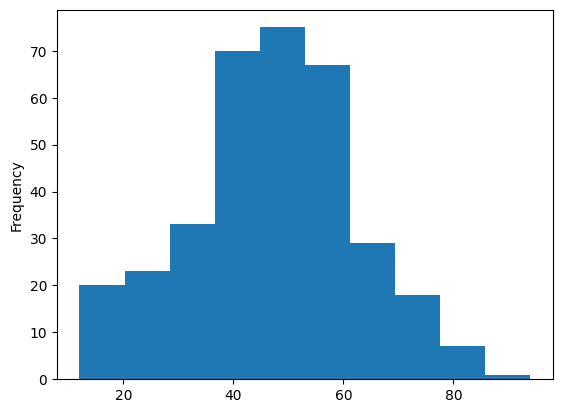

In [16]:
df['ingredients'].str.len().plot(kind='hist')

3. diet

- still veg friendly but not that much

In [17]:
df['diet'].value_counts()

diet
vegetarian        226
non vegetarian    117
Name: count, dtype: int64

In [18]:
#percentage
round(df['diet'].value_counts(normalize=True)*100, 2)

diet
vegetarian        65.89
non vegetarian    34.11
Name: proportion, dtype: float64

<Axes: xlabel='diet'>

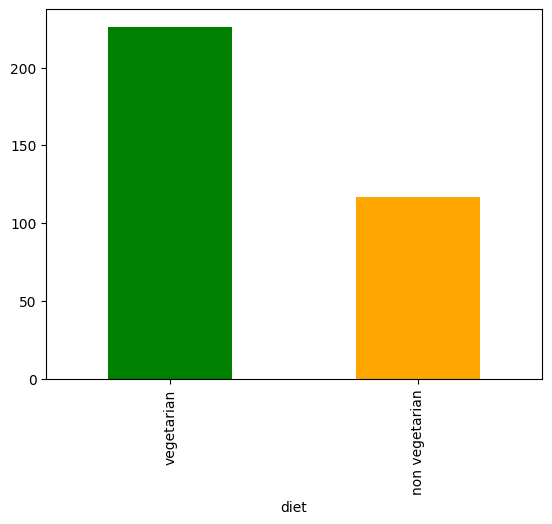

In [19]:
df['diet'].value_counts().plot(kind='bar', color=['green', 'orange'])

4. Prep time

- removed outlier > 150 

In [20]:
df['prep_time'].describe()

count    343.000000
mean      34.058309
std       56.693101
min        5.000000
25%       10.000000
50%       20.000000
75%       35.000000
max      500.000000
Name: prep_time, dtype: float64

<Axes: xlabel='prep_time'>

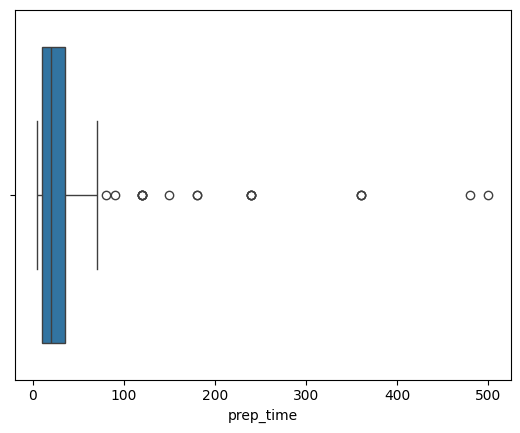

In [21]:
sns.boxplot(x=df['prep_time'])

#outliers

In [22]:
df[df['prep_time'] >= 150]

,name,ingredients,diet,prep_time,cook_time,total_time,flavour,dish_type,state,region
29,Misti doi,"Milk, jaggery",vegetarian,480,30,510,sweet,dessert,west bengal,east
33,Ras malai,"Chhena, reduced milk, pistachio",vegetarian,180,60,240,sweet,dessert,west bengal,east
46,Obbattu holige,"Maida flour, turmeric, coconut, chickpeas, jag...",vegetarian,180,60,240,sweet,main course,karnataka,south
48,Poornalu,"Chana dal, jaggery",vegetarian,240,60,300,sweet,dessert,andhra pradesh,south
66,Chak Hao Kheer,"Rice, milk, sugar, cardamom",vegetarian,240,45,285,sweet,dessert,manipur,north east
114,Pindi chana,"Fennel, tea bags, tomato, kasuri methi, cinnamon",vegetarian,500,120,620,spicy,main course,punjab,north
122,Tandoori Chicken,"Greek yogurt, garam masala, kasuri methi, mari...",non vegetarian,240,30,270,spicy,main course,punjab,north
124,Attu,"Whole wheat flour, arhar dal, ginger, kala jee...",vegetarian,150,25,175,spicy,starter,andhra pradesh,south
128,Dosa,"Chana dal, urad dal, whole urad dal, blend ric...",vegetarian,360,90,450,spicy,starter,tamil nadu,south
130,Idli,"Split urad dal, urad dal, idli rice, thick poh...",vegetarian,360,90,450,spicy,starter,tamil nadu,south


In [23]:
df = df[df['prep_time'] <= 150]

In [24]:
df['prep_time'].describe()

count    332.000000
mean      25.006024
std       19.440356
min        5.000000
25%       10.000000
50%       20.000000
75%       35.000000
max      150.000000
Name: prep_time, dtype: float64

<Axes: xlabel='prep_time'>

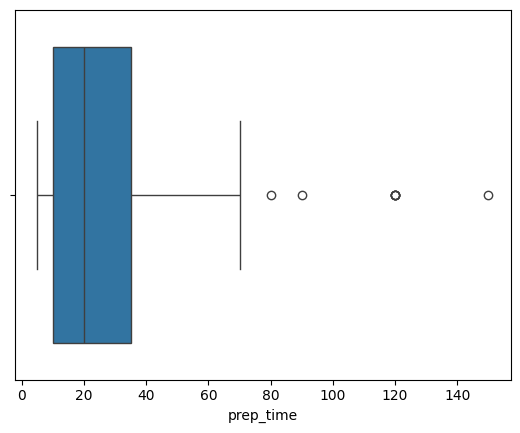

In [25]:
sns.boxplot(x=df['prep_time'])

#valid outliers


5. cook time

In [26]:
df['cook_time'].describe()

count    332.000000
mean      46.795181
std       25.696819
min        2.000000
25%       30.000000
50%       36.000000
75%       70.000000
max      120.000000
Name: cook_time, dtype: float64

<Axes: xlabel='cook_time'>

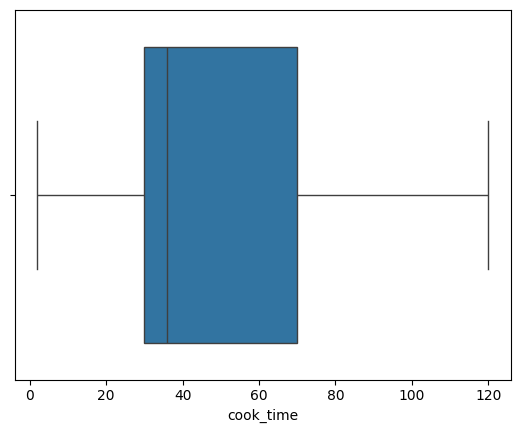

In [27]:
sns.boxplot(x=df['cook_time'])


6. flavour

In [28]:
df['flavour'].value_counts()

#spicy dominate


flavour
spicy      216
sweet       84
unknown     28
bitter       4
Name: count, dtype: int64

<Axes: xlabel='flavour'>

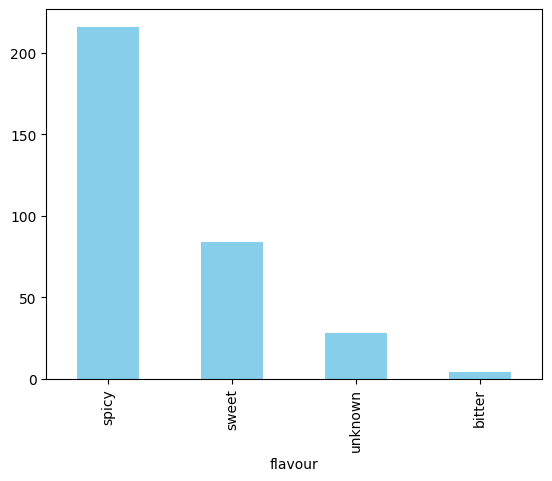

In [29]:
df['flavour'].value_counts().plot(kind='bar', color='skyblue')

#valid values

<Axes: ylabel='count'>

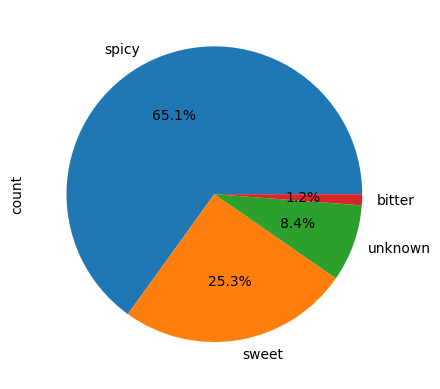

In [30]:
df['flavour'].value_counts().plot(kind= 'pie', autopct = '%0.1f%%')

7. dish type

In [31]:
df['dish_type'].value_counts()

#main course dominate


dish_type
main course    182
dessert         81
starter         67
soup             2
Name: count, dtype: int64

In [32]:
df[df['dish_type'] == 'soup']

# both crab rasam, chicken rasam are starter type dish 

,name,ingredients,diet,prep_time,cook_time,total_time,flavour,dish_type,state,region
290,crab rasam,"crab, tamarind, tomato, garlic, pepper, rasam ...",non vegetarian,30,65,95,spicy,soup,tamil nadu,south
291,chicken rasam,"chicken, tamarind, tomato, garlic, chili, rasa...",non vegetarian,30,65,95,spicy,soup,tamil nadu,south


In [33]:
# change soup to starter
df.loc[df['dish_type'] == 'soup', 'dish_type'] = 'starter'


In [34]:
df['dish_type'].value_counts()

dish_type
main course    182
dessert         81
starter         69
Name: count, dtype: int64

<Axes: xlabel='dish_type'>

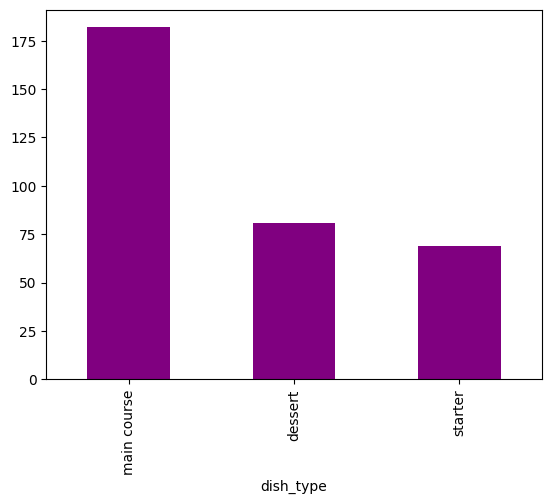

In [35]:
df['dish_type'].value_counts().plot(kind='bar', color='purple')

<Axes: ylabel='count'>

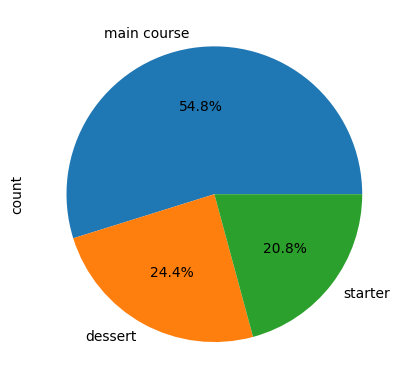

In [36]:
df['dish_type'].value_counts().plot(kind='pie', autopct='%0.1f%%')

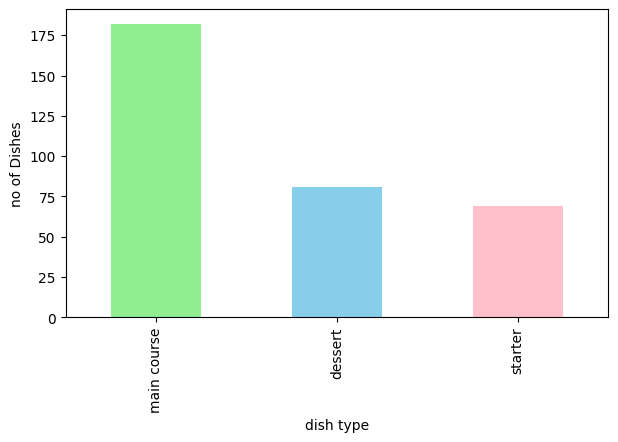

In [37]:
# dishes per category

df['dish_type'].value_counts().plot(kind='bar',color=['lightgreen', 'skyblue', 'pink'],figsize=(7,4))
plt.xlabel("dish type")
plt.ylabel("no of Dishes")
plt.show()

8. state

In [38]:
df['state'].nunique()    # 25
df['state'].value_counts().head(10)

state
gujarat           52
tamil nadu        51
punjab            43
maharashtra       42
west bengal       30
assam             21
uttar pradesh     18
kerala            13
odisha            10
andhra pradesh    10
Name: count, dtype: int64

<Axes: xlabel='state'>

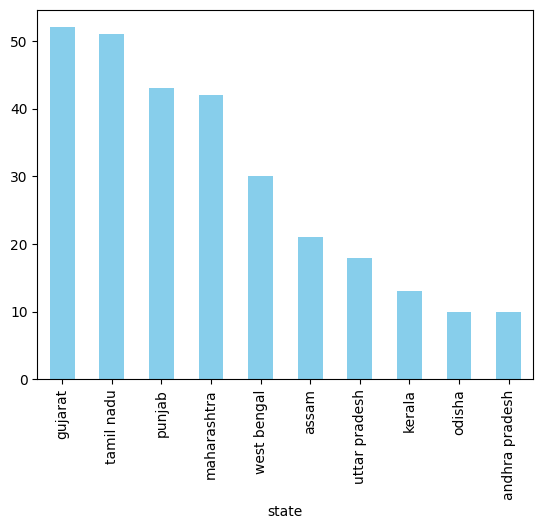

In [39]:
df['state'].value_counts().head(10).plot(kind='bar', color='skyblue')

9. Region

In [40]:
df['region'].nunique()   


6

In [41]:
round(df['region'].value_counts(normalize=True)*100, 2)

region
west          31.93
south         26.81
north         21.08
east          12.05
north east     7.23
central        0.90
Name: proportion, dtype: float64

<Axes: xlabel='region'>

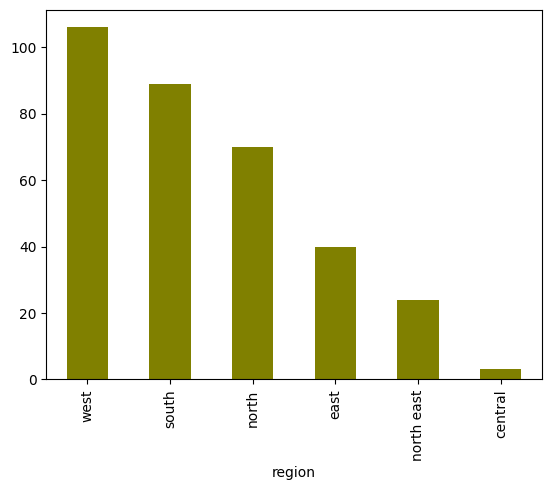

In [42]:
df['region'].value_counts().plot(kind='bar', color='olive')

<Axes: ylabel='count'>

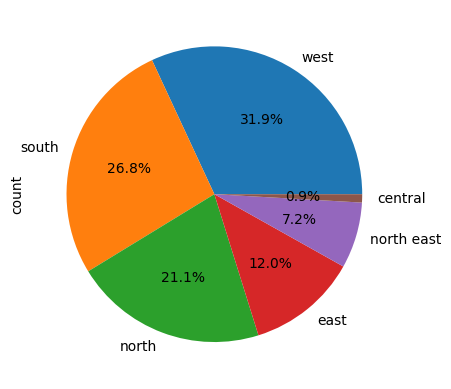

In [43]:
df['region'].value_counts().plot(kind='pie', autopct='%0.1f%%')

**BIVARIATE ANALYSIS**

In [44]:
#diet vs total_time
# diet vs region
# diet vs state
# diet vs flavour 

C:\Temp\ipykernel_9192\1296658204.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('diet')['total_time'].mean().plot(kind='bar')


<Axes: xlabel='diet'>

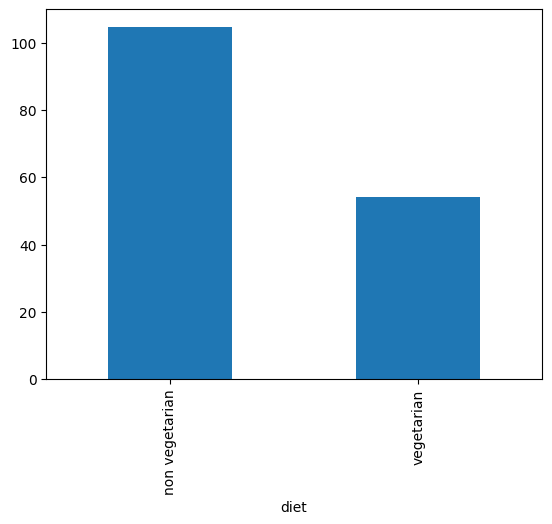

In [45]:
# diet vs total_time
df.groupby('diet')['total_time'].mean().plot(kind='bar')

# logical difference, non veg takes more time

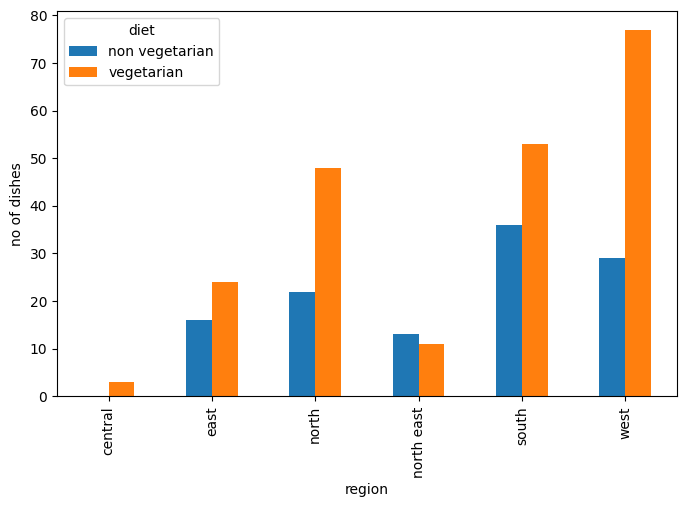

In [46]:
# diet vs region
df.groupby('region')['diet'].value_counts().unstack().plot(kind='bar', figsize=(8,5))
plt.ylabel("no of dishes")
plt.show()

# valid differences coz rajasthan, gujarat are veg dominant regions
# not satisfied with north region but its okay for now

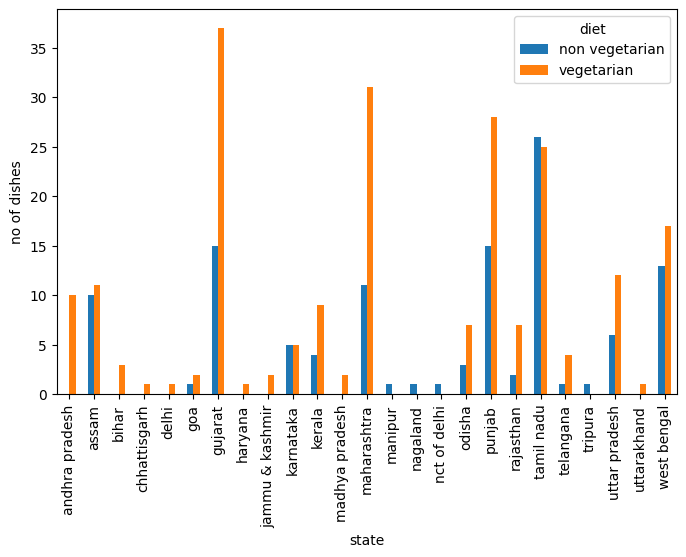

In [47]:
# diet vs state
df.groupby('state')['diet'].value_counts().unstack().plot(kind='bar', figsize=(8,5))
plt.ylabel("no of dishes")
plt.show()

# valid for gujarat 
# MH is okay for now

C:\Temp\ipykernel_9192\1114772368.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('diet')['flavour'].value_counts().unstack().plot(kind='bar', figsize=(8,5))


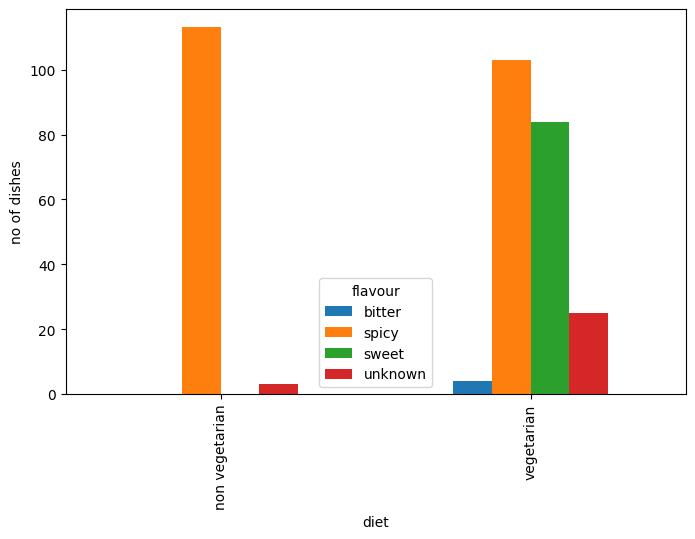

In [48]:
# diet vs flavour
df.groupby('diet')['flavour'].value_counts().unstack().plot(kind='bar', figsize=(8,5))
plt.ylabel('no of dishes')
plt.show()

# non veg dishes are not sweet dishes at all

In [49]:
#total_time vs flavour
#total_time vs dish_type
#total_time vs region

C:\Temp\ipykernel_9192\496189245.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('flavour')['total_time'].mean().plot(kind='bar')


<Axes: xlabel='flavour'>

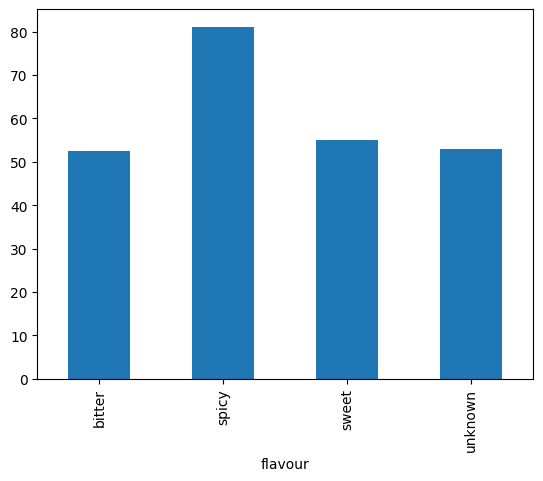

In [50]:
#total_time vs flavour
df.groupby('flavour')['total_time'].mean().plot(kind='bar')

# valid spicy dishes take more time

<Axes: xlabel='dish_type'>

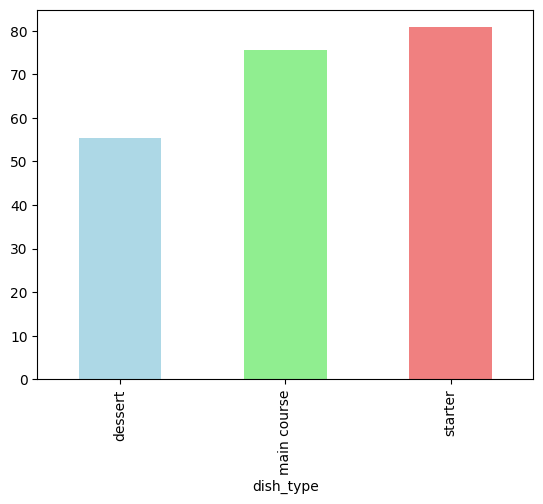

In [51]:
# total_time vs dish_type
df.groupby('dish_type')['total_time'].mean().plot(kind='bar',color=['lightblue','lightgreen','lightcoral'])

# valid generally starter take more time

<Axes: xlabel='region'>

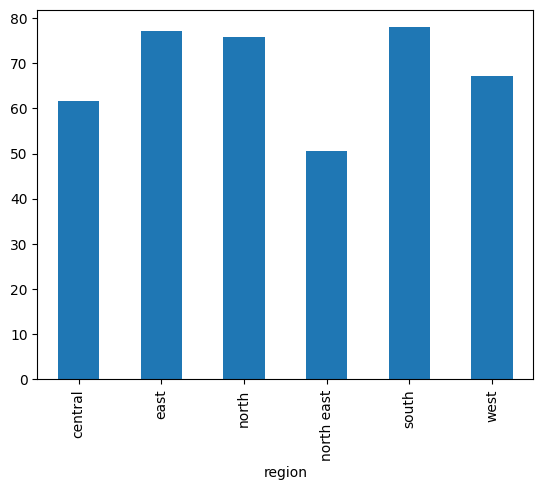

In [52]:
#total_time vs region
df.groupby('region')['total_time'].mean().plot(kind='bar')

# valid coz we take 30+ non veg dishes from tamil nadu

In [53]:
# flavour vs dish_type 
#2. flavour vs region 
#4. flavour vs diet

C:\Temp\ipykernel_9192\3927018512.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('flavour')['dish_type'].value_counts().unstack().plot(kind='bar')


<Axes: xlabel='flavour'>

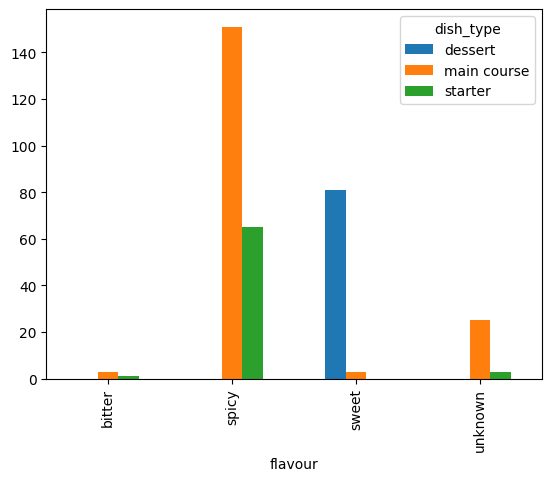

In [54]:
# flavour vs dish_type 
df.groupby('flavour')['dish_type'].value_counts().unstack().plot(kind='bar')

# starter - spicy dominant
# main - spicy dominant
# dessert - sweet dominant

C:\Temp\ipykernel_9192\2140408214.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('flavour')['region'].value_counts().unstack().plot(kind='bar')


<Axes: xlabel='flavour'>

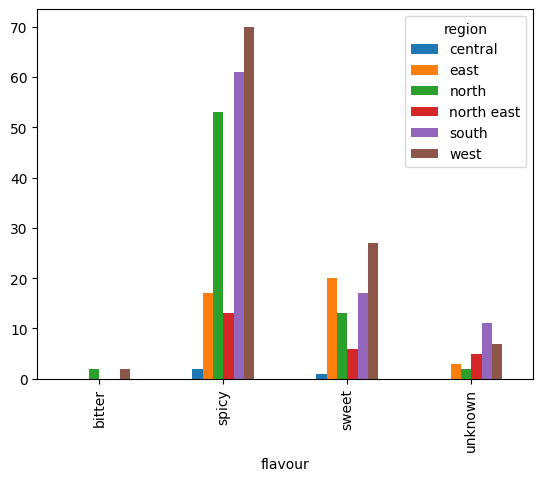

In [55]:
# flavour vs region
df.groupby('flavour')['region'].value_counts().unstack().plot(kind='bar')

# spicy dominant in west,north, south regions

<Axes: xlabel='dish_type'>

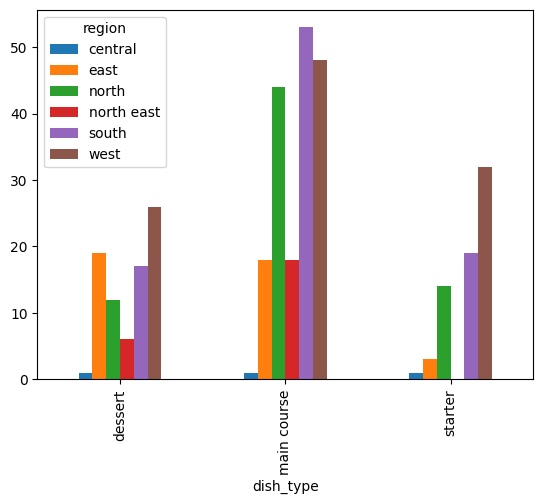

In [56]:
#dish_type vs region
df.groupby('dish_type')['region'].value_counts().unstack().plot(kind='bar')

# northest doesn't like starter at all

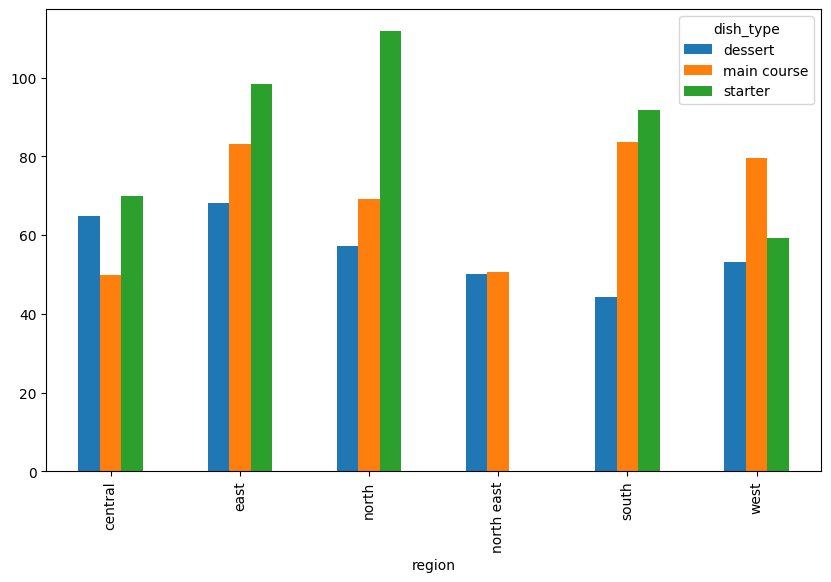

In [57]:
# multivariate analysis (region, dish_type vs total_time)
pd.crosstab(df['region'], df['dish_type'],values=df['total_time'],aggfunc='mean').round(1).plot(kind='bar', figsize=(10,6))

plt.show()

# region wise which type of dish take more time 

In [58]:
df.to_csv('indian_food_final.csv', index=False)

In [59]:
unique_ingredients = (df['ingredients'].dropna().str.lower().str.split(',').explode().str.strip().loc[lambda x: x != ''].unique())

In [60]:
len(unique_ingredients)

387

In [61]:
unique_ingredients

array(['maida flour', 'yogurt', 'oil', 'sugar', 'gram flour', 'ghee',
       'carrots', 'milk', 'cashews', 'raisins', 'flour', 'kewra',
       'clarified butter', 'almonds', 'pistachio', 'saffron',
       'green cardamom', 'milk powder', 'plain flour', 'baking powder',
       'water', 'rose water', 'sugar syrup', 'lentil flour', 'maida',
       'corn flour', 'baking soda', 'vinegar', 'curd', 'turmeric',
       'cardamom', 'cottage cheese', 'rice', 'dried fruits', 'nuts',
       'refined flour', 'besan', 'powdered sugar', 'yoghurt',
       'firm white pumpkin', 'kitchen lime', 'alum powder',
       'condensed milk', 'spices', 'semolina', 'khoa', 'coconut',
       'molu leaf', 'dry fruits', 'chhena', 'chenna cheese', 'cream',
       'lemon juice', 'coconut flakes', 'chenna', 'fried milk power',
       'fennel seeds', 'besan flour', 'rice flour', 'wheat flour',
       'sweetened milk', 'jaggery', 'vegetable oil', 'elachi',
       'cardamom powder', 'cashews and raisins', 'jaggery syrup',


In [62]:
ingredient_health_score = {

# FLOURS / GRAINS
"all purpose flour": -4,
"plain flour": -4,
"white flour": -4,
"refined flour": -4,
"maida": -4,
"maida flour": -4,
"atta": 2,
"wheat flour": 2,
"whole wheat flour": 3,
"whole wheat rava": 2,
"brown rice": 3,
"basmati rice": 1,
"parboiled rice": 1,
"raw rice": 0,
"rice": 0,
"forbidden black rice": 4,
"glutinous rice": 0,
"sticky rice": 0,
"rice flour": 0,
"rava": 0,
"sooji": 0,
"semolina": 0,
"beaten rice flakes": 1,
"rice flakes": 1,
"thick poha": 1,
"thin rice flakes": 1,
"sabudana": -2,
"vermicelli pudding": -3,

# LEGUMES / DAL
"arhar dal": 4,
"toor dal": 4,
"chana dal": 4,
"chana daal": 4,
"black lentils": 4,
"masoor dal": 4,
"moong dal": 4,
"yellow moong daal": 4,
"urad dal": 3,
"white urad dal": 3,
"split urad dal": 3,
"green moong beans": 4,
"moong beans": 4,
"mung bean": 4,
"lentils": 5,
"pigeon peas": 4,
"split pigeon peas": 4,
"sattu": 5,
"roasted gram flour": 4,
"besan": 4,
"besan flour": 4,
"gram flour": 4,
"chickpeas": 5,
"kala chana": 5,
"chole": 5,
"red kidney beans": 5,
"whole red beans": 5,

# VEGETABLES
"potato": 1,
"potatoes": 1,
"baby potatoes": 1,
"boiled potatoes": 1,
"mashed potato": 0,
"sweet potato": 4,
"raw banana": 3,
"banana flower": 4,
"banana leaf": 3,
"arbi ke patte": 4,
"elephant foot yam": 2,
"ridge gourd": 4,
"bottle gourd": 4,
"bitter gourd": 5,
"tindora": 4,
"potol": 4,
"pumpkin flowers": 4,
"firm white pumpkin": 4,
"brinjal": 4,
"baingan": 4,
"eggplant": 4,
"cabbage": 4,
"cauliflower": 4,
"gobi": 4,
"beans": 4,
"green beans": 4,
"french beans": 4,
"long beans": 4,
"peas": 4,
"green peas": 4,
"fresh green peas": 4,
"frozen green peas": 3,
"carrot": 4,
"carrots": 4,
"beetroot": 4,
"bell pepper": 4,
"bell peppers": 4,
"capsicum": 4,
"shimla mirch": 4,
"cucumber": 4,
"tomato": 4,
"tomatoes": 4,
"chopped tomatoes": 4,
"tomato paste": 1,
"tomato sauce": -3,
"spinach": 5,
"palak": 5,
"methi leaves": 5,
"fenugreek leaves": 5,
"mustard green": 5,
"sorrel leaves": 5,
"watercress": 5,
"greens": 4,
"drumstick": 4,
"drumsticks": 4,
"ladies finger": 4,

# FRUITS / DRIED FRUITS
"banana": 3,
"mango": 3,
"pomegranate": 4,
"apricots": 3,
"dates": 2,
"dry dates": 2,
"raisins": 1,
"dried mango": 1,
"dried fruits": 1,
"dry fruits": 1,
"mixed fruits": 1,

# NUTS / SEEDS
"almond": 4,
"almonds": 4,
"badam": 4,
"cashew": 2,
"cashews": 2,
"cashew nuts": 2,
"peanut": 3,
"peanuts": 3,
"raw peanuts": 3,
"pistachio": 4,
"mixed nuts": 3,
"chia seed": 5,
"sesame seeds": 4,
"white sesame seeds": 4,
"black sesame seeds": 4,
"poppy seeds": 4,
"khus khus": 4,
"khus-khus seeds": 4,
"musk melon seeds": 4,

# MEAT / FISH / EGGS
"chicken": 3,
"country chicken": 3,
"skinless chicken breasts": 4,
"chicken chunks": 3,
"chicken mince": 3,
"chicken thighs": 2,
"egg": 3,
"eggs": 3,
"whole egg": 3,
"egg yolks": 1,
"fish": 4,
"fish fillet": 4,
"fish fillets": 4,
"hilsa fish": 4,
"seer fish": 4,
"bombay duck": 3,
"bombil fish": 3,
"fish roe": 2,
"fish head": 2,
"prawn": 3,
"prawns": 3,
"shrimp": 3,
"crab": 4,
"lobster": 3,
"mutton": 1,
"mutton mince": 1,
"mutton keema": 1,
"lamb": 1,
"beef": 0,
"pork": -1,
"boiled pork": 0,
"quail meat": 3,

# DAIRY
"milk": 1,
"litre milk": 1,
"curd": 3,
"dahi": 3,
"yoghurt": 3,
"yogurt": 3,
"greek yogurt": 4,
"paneer": 1,
"chenna": 1,
"chhena": 1,
"chenna cheese": 0,
"cottage cheese": 1,
"khoa": -2,
"mawa": -2,
"cream": -4,
"heavy cream": -4,
"whipping cream": -4,
"malai": -4,
"nestle cream": -5,
"condensed milk": -5,
"sweetened milk": -4,
"milk powder": -3,
"skimmed milk powder": -2,

# OILS / FATS
"oil": -2,
"vegetable oil": -3,
"sunflower oil": -2,
"peanut oil": -1,
"mustard oil": 1,
"sesame oil": 1,
"olive oil": 3,
"avocado oil": 4,
"rapeseed oil": 1,
"coconut oil": -1,
"ghee": -3,
"clarified butter": -3,
"butter": -4,

# SWEETENERS
"sugar": -5,
"powdered sugar": -5,
"sugar syrup": -5,
"jaggery": -2,
"jaggery syrup": -3,
"honey": 1,

# SPICES / HERBS
"turmeric": 5,
"ginger": 4,
"garlic": 4,
"coriander": 4,
"cilantro": 4,
"black pepper": 4,
"cumin": 4,
"fennel": 4,
"fennel seeds": 4,
"cardamom": 4,
"green cardamom": 4,
"cinnamon": 4,
"cloves": 4,
"bay leaf": 3,
"star anise": 3,
"mustard seeds": 4,
"nigella seeds": 4,
"kasuri methi": 4,

# MISC
"salt": 0,
"water": 0,
"vinegar": 0,
"wine vinegar": 0,
"soy sauce": -2,
"sauce": -3,
"bread": -3,
"white bread slices": -4,
"whole wheat bread": 1,
"naan bread": -3,
"paratha": -3,
"pav": -3,
"parotta": -4,
"bhatura": -4
}


In [63]:
def health_score_and_status(ingredient_string):

    if pd.isna(ingredient_string):
        return 0, "Balanced"

    ingredients = ingredient_string.lower().split(",")

    score = 0
    for ing in ingredients:
        ing = ing.strip()
        score += ingredient_health_score.get(ing, 0)

    if score >= 3:
        status = "Healthy"
    elif score <= -3:
        status = "Unhealthy"
    else:
        status = "Balanced"

    return score, status


In [64]:
df["health_score"] = df["ingredients"].apply(
    lambda x: health_score_and_status(x)[0]
)

df["health_status"] = df["ingredients"].apply(
    lambda x: health_score_and_status(x)[1]
)


In [65]:
df

,name,ingredients,diet,prep_time,cook_time,total_time,flavour,dish_type,state,region,health_score,health_status
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,70,sweet,dessert,west bengal,east,-8,Unhealthy
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,110,sweet,dessert,rajasthan,west,-4,Unhealthy
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,75,sweet,dessert,punjab,north,0,Balanced
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,45,sweet,dessert,rajasthan,west,2,Balanced
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,55,sweet,dessert,west bengal,east,-14,Unhealthy
...,...,...,...,...,...,...,...,...,...,...,...,...
376,dimer dalna,"egg, potato, onion, tomato, spices",non vegetarian,30,75,105,spicy,main course,west bengal,east,8,Healthy
377,muri ghonto,"fish head, rice, spices, mustard oil",non vegetarian,35,85,120,spicy,main course,west bengal,east,3,Healthy
378,prawn cutlet,"prawn, bread crumbs, chili, ginger, garlic",non vegetarian,30,70,100,spicy,starter,west bengal,east,11,Healthy
381,chicken curry,"chicken, onion, tomato, chili, mustard oil",non vegetarian,40,90,130,spicy,main course,west bengal,east,8,Healthy


In [84]:
status = df[df["name"] == "Balu shahi"]["health_status"]

In [86]:
status[0]

'Unhealthy'

In [66]:
df.to_csv('indian_food_final2.csv', index=False)

UNIVARRIANT 


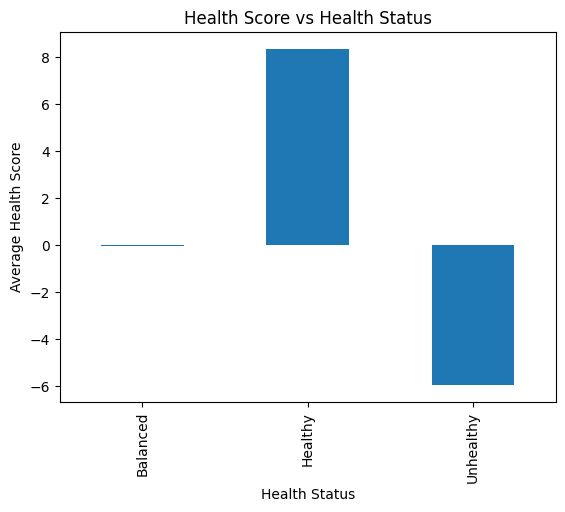

In [67]:
df.groupby("health_status")["health_score"].mean().plot(kind="bar")

plt.xlabel("Health Status")
plt.ylabel("Average Health Score")
plt.title("Health Score vs Health Status")
plt.show()


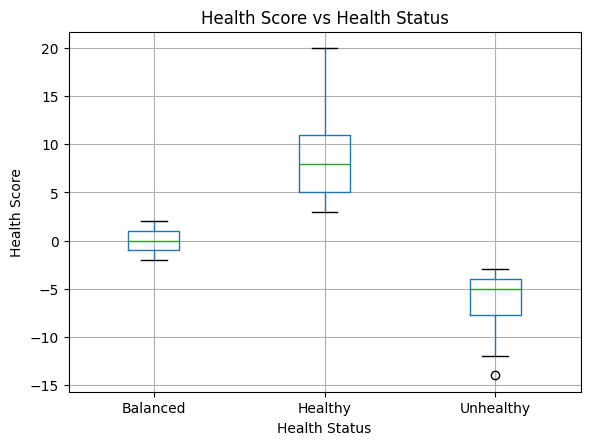

In [68]:
df.boxplot(column="health_score", by="health_status")
plt.title("Health Score vs Health Status")
plt.suptitle("")
plt.xlabel("Health Status")
plt.ylabel("Health Score")
plt.show()

C:\Temp\ipykernel_9192\1747362479.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("diet")["health_score"].mean().plot(kind="bar")


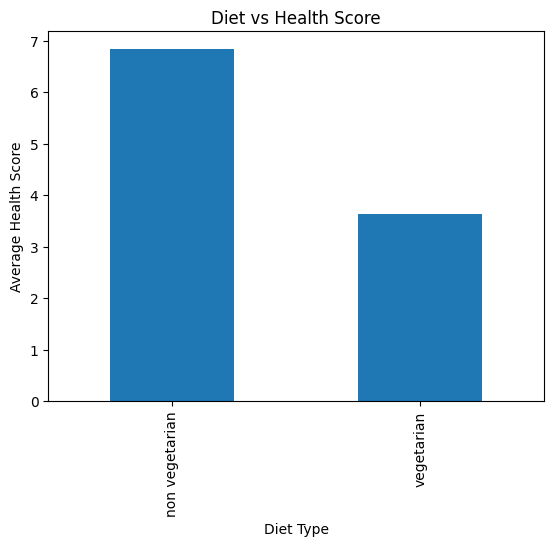

In [81]:
df.groupby("diet")["health_score"].mean().plot(kind="bar")

plt.xlabel("Diet Type")
plt.ylabel("Average Health Score")
plt.title("Diet vs Health Score")
plt.show()


C:\Temp\ipykernel_9192\1375925860.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  diet_status = df.groupby(["diet", "health_status"]).size().unstack()


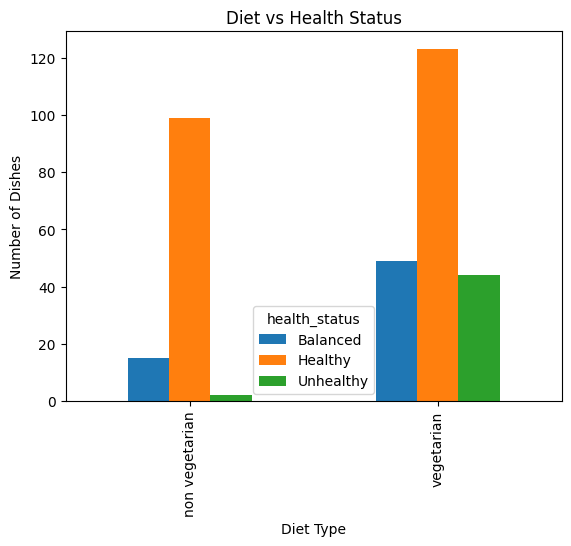

In [92]:
diet_status = df.groupby(["diet", "health_status"]).size().unstack()

diet_status.plot(kind="bar")

plt.xlabel("Diet Type")
plt.ylabel("Number of Dishes")
plt.title("Diet vs Health Status")
plt.show()


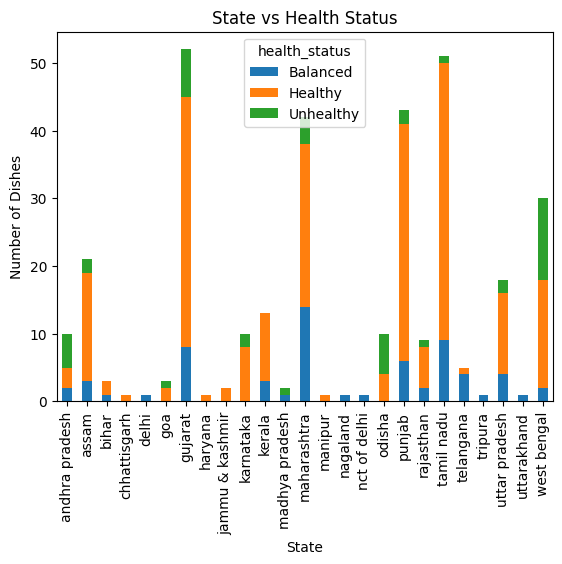

In [71]:
state_status = df.groupby(["state", "health_status"]).size().unstack()

state_status.plot(kind="bar", stacked=True)

plt.xlabel("State")
plt.ylabel("Number of Dishes")
plt.title("State vs Health Status")
plt.show()


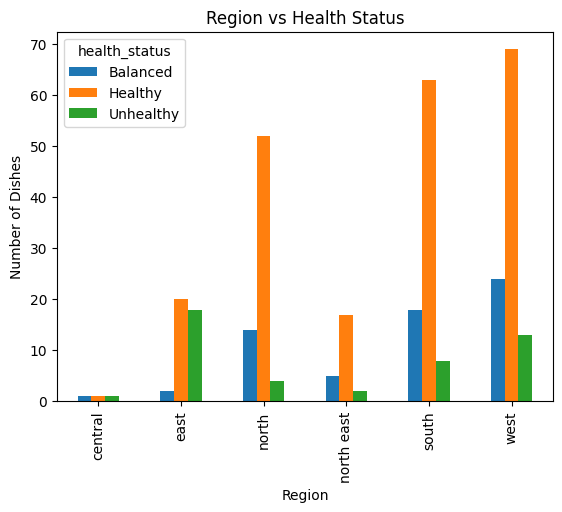

In [87]:
region_status = df.groupby(["region", "health_status"]).size().unstack()

region_status.plot(kind="bar",)

plt.xlabel("Region")
plt.ylabel("Number of Dishes")
plt.title("Region vs Health Status")
plt.show()


C:\Temp\ipykernel_9192\3998651546.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["flavour", "health_status"]).size().unstack().plot(kind="bar", stacked=True)


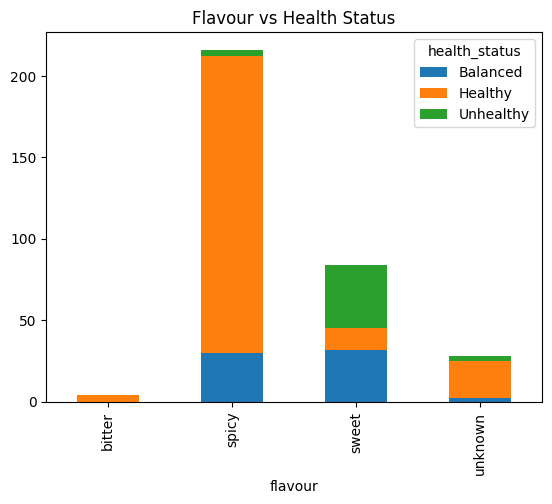

In [73]:
df.groupby(["flavour", "health_status"]).size().unstack().plot(kind="bar", stacked=True)

plt.title("Flavour vs Health Status")
plt.show()

C:\Temp\ipykernel_9192\890955367.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["flavour", "health_status"]).size().unstack().plot(kind="bar")


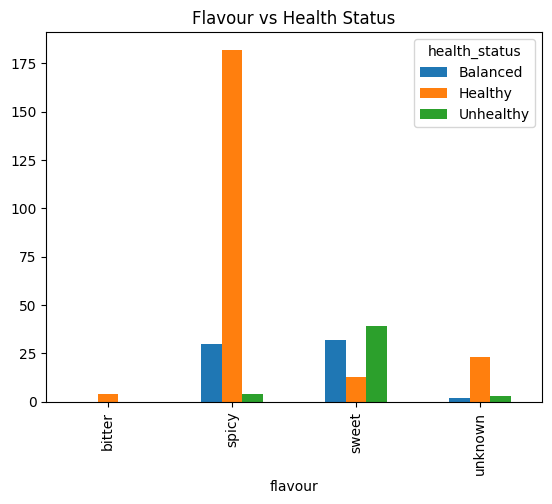

In [90]:
df.groupby(["flavour", "health_status"]).size().unstack().plot(kind="bar")

plt.title("Flavour vs Health Status")
plt.show()

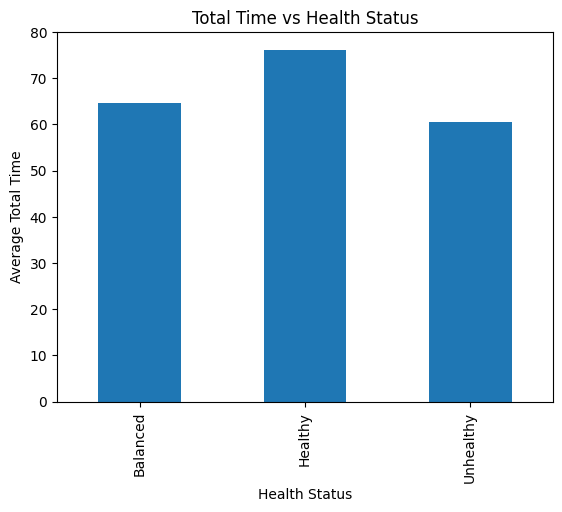

In [74]:
df.groupby("health_status")["total_time"].mean().plot(kind="bar")

plt.xlabel("Health Status")
plt.ylabel("Average Total Time")
plt.title("Total Time vs Health Status")
plt.show()

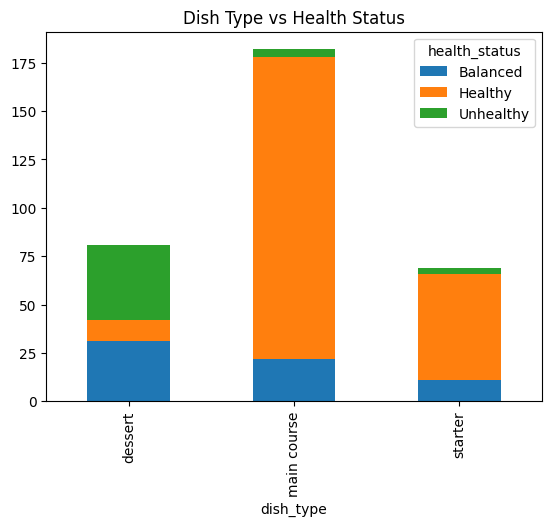

In [75]:
df.groupby(["dish_type", "health_status"]).size().unstack().plot(kind="bar", stacked=True)

plt.title("Dish Type vs Health Status")
plt.show()

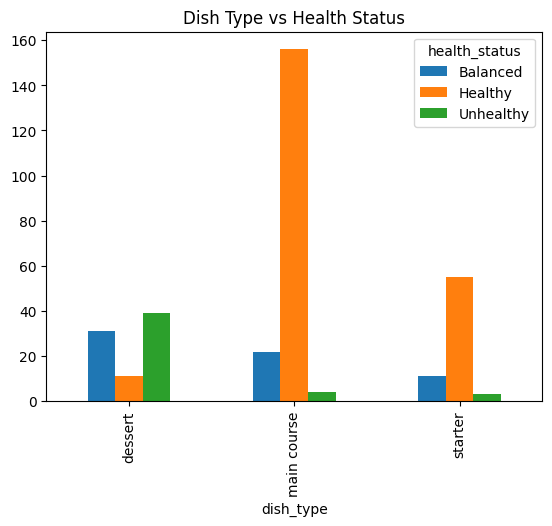

In [91]:
df.groupby(["dish_type", "health_status"]).size().unstack().plot(kind="bar")

plt.title("Dish Type vs Health Status")
plt.show()

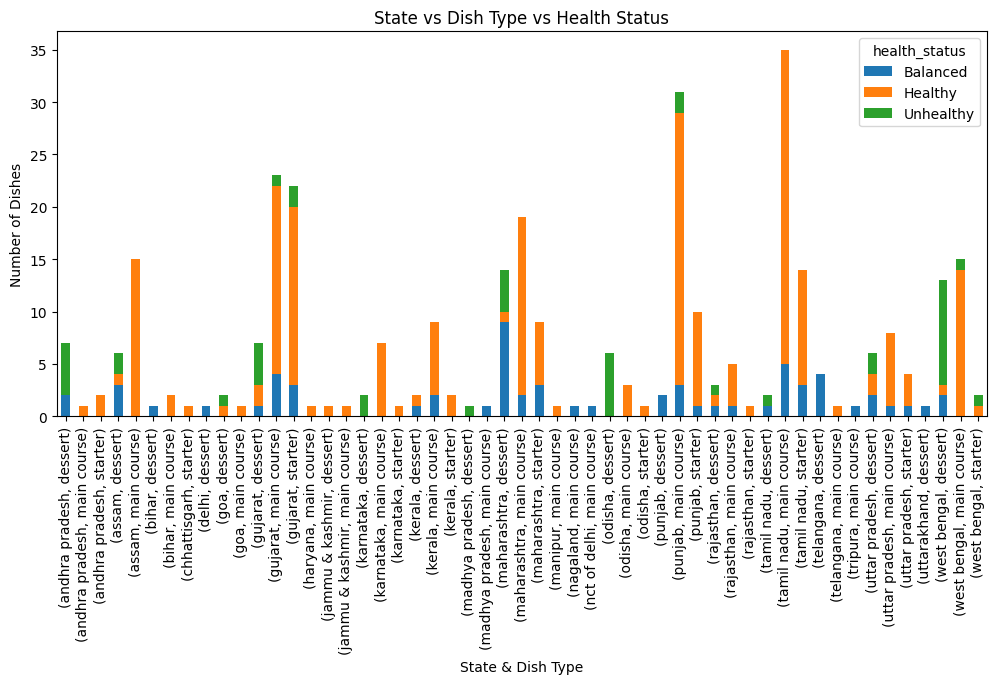

In [76]:
df.groupby(["state", "dish_type", "health_status"]).size().unstack().plot(kind="bar", stacked=True, figsize=(12,5))

plt.title("State vs Dish Type vs Health Status")
plt.xlabel("State & Dish Type")
plt.ylabel("Number of Dishes")
plt.show()


C:\Temp\ipykernel_9192\2237511340.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["state", "diet", "health_status"]).size().unstack().plot(kind="bar", stacked=True,figsize=(12,5))


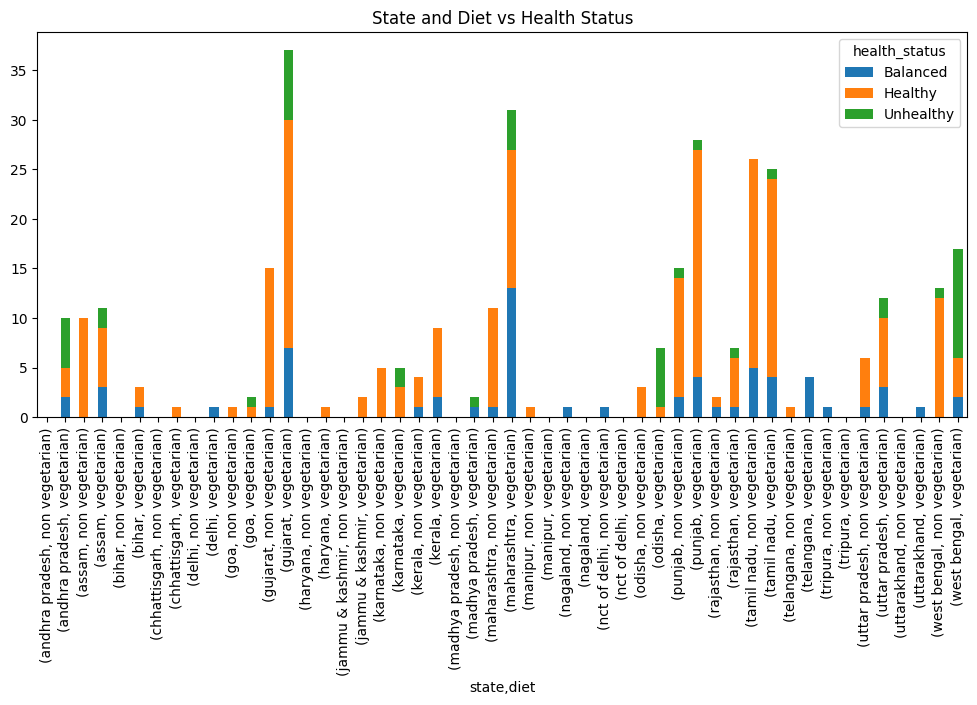

In [77]:
df.groupby(["state", "diet", "health_status"]).size().unstack().plot(kind="bar", stacked=True,figsize=(12,5))

plt.title("State and Diet vs Health Status")
plt.show()

C:\Temp\ipykernel_9192\2586084008.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["region", "diet", "health_status"]).size().unstack().plot(kind="bar", stacked=True)


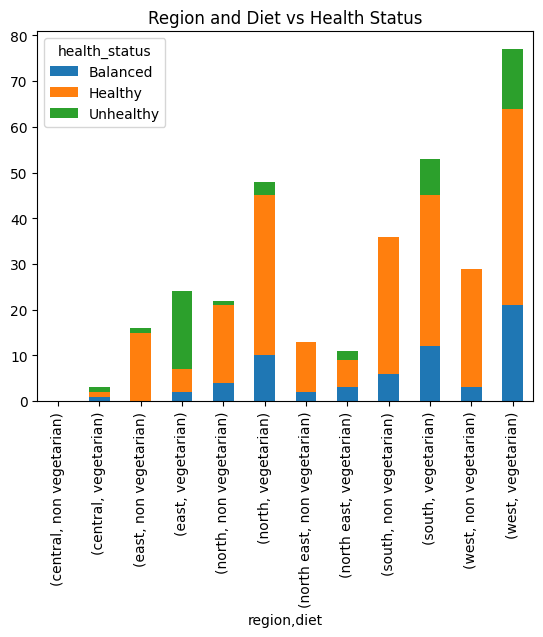

In [78]:
df.groupby(["region", "diet", "health_status"]).size().unstack().plot(kind="bar", stacked=True)

plt.title("Region and Diet vs Health Status")
plt.show()

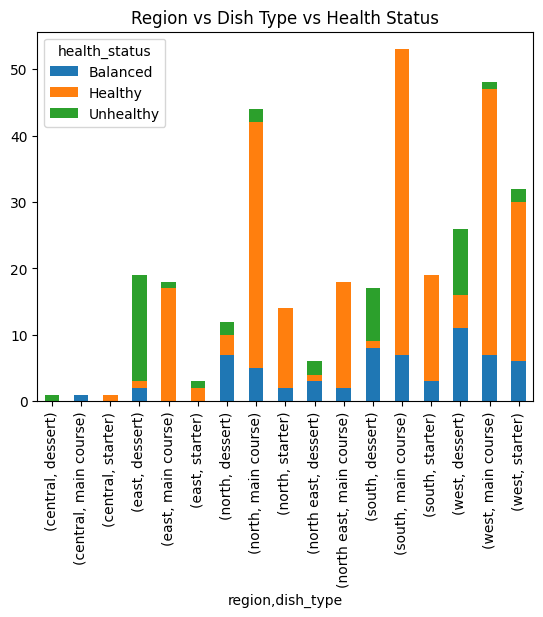

In [79]:
df.groupby(["region", "dish_type", "health_status"]).size().unstack().plot(kind="bar", stacked=True)

plt.title("Region vs Dish Type vs Health Status")
plt.show()